# Testing the image caption API

In this notebook, we will test the image caption API using a few images to see how well it performs.

In [ ]:
# Install requirements 
%pip install requests


In [15]:
import requests
from PIL import Image


## Define the API Endpoint and Helper Functions

Set up the API endpoint and create a function to upload an image and receive a caption.


In [4]:
# Define the API endpoint
api_endpoint = "http://localhost:8000/upload"

def upload_image(image_path):
    # Open the image file
    with open(image_path, 'rb') as img_file:
        # Send the image to the API
        response = requests.post(api_endpoint, files={'file': img_file})
    
    # Check the response status
    if response.status_code == 200:
        # Parse the JSON response
        base_caption = response.json().get('general_caption', 'No caption found')
        refined_caption = response.json().get('refined_caption', 'No caption found')
        detected_pet = response.json().get('detected_pet', 'No pet detected')
        confidence = response.json().get('confidence', 'No confidence score')
        return base_caption, detected_pet, confidence, refined_caption
    else:
        return None, None, None, None


## Test the API

Let's start with a photo of Chiki from our testing dataset.

Detected Pet: chiki
Confidence: 0.9999834299087524
Base Caption: a dog is sitting in a backpack on the grass 
Refined Caption: Chiki enjoying the cool grass on a sunny day. Pure relaxation.


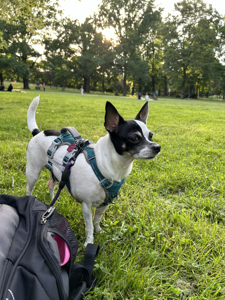

In [25]:
image_path = '../dataset/test/chiki/IMG_8976.jpg'

# Upload the image and get the response
base_caption, detected_pet, confidence, refined_caption = upload_image(image_path)

# Display the results
print(f"Detected Pet: {detected_pet}")
print(f"Confidence: {confidence}")
print(f"Base Caption: {base_caption}")
print(f"Refined Caption: {refined_caption}")

# Display the image
img = Image.open(image_path)
img.thumbnail((300, 300))
img


That is not bad at all! The caption is quite accurate.
Let's now test with a photo of Lola.

Detected Pet: lola
Confidence: 0.9999829530715942
Base Caption: a black dog sleeping on a white pillow 
Refined Caption: Lola dreaming sweet dreams on her pillow.


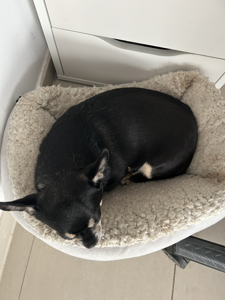

In [26]:
image_path = '../dataset/test/lola/IMG_8577.jpg'

# Upload the image and get the response
base_caption, detected_pet, confidence, refined_caption = upload_image(image_path)

# Display the results
print(f"Detected Pet: {detected_pet}")
print(f"Confidence: {confidence}")
print(f"Base Caption: {base_caption}")
print(f"Refined Caption: {refined_caption}")

# Display the image
img = Image.open(image_path)
img.thumbnail((300, 300))
img

It't not perfect, but it's quite good. Lola is sleeping on her bed, not a pillow. But it's a good guess.
Let's see what happens with a photo with both dogs.

Detected Pet: chiki-and-lola
Confidence: 0.9674344062805176
Base Caption: a dog laying on the grass next to a man 
Refined Caption: Chiki enjoying the cool grass on a sunny day. Pure relaxation.


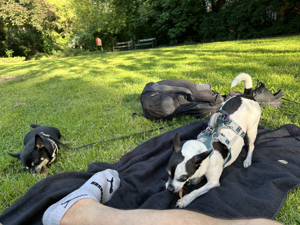

In [27]:
image_path = '../dataset/test/chiki-and-lola/IMG_8953.jpg'

# Upload the image and get the response
base_caption, detected_pet, confidence, refined_caption = upload_image(image_path)

# Display the results
print(f"Detected Pet: {detected_pet}")
print(f"Confidence: {confidence}")
print(f"Base Caption: {base_caption}")
print(f"Refined Caption: {refined_caption}")

# Display the image
img = Image.open(image_path)
img.thumbnail((300, 300))
img

Not what I was expecting at all. The caption is the same as the one with the photo of Chiki but with both dogs. 
Let's try again with a different photo.

Detected Pet: lola
Confidence: 0.914757490158081
Base Caption: a dog sitting on a blanket on a lawn 
Refined Caption: Lola enjoying a sunny day on the lawn. Perfect spot for relaxation.


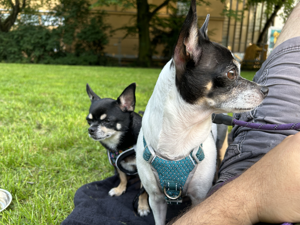

In [31]:
image_path = '../dataset/test/chiki-and-lola/IMG_8979.jpg'

# Upload the image and get the response
base_caption, detected_pet, confidence, refined_caption = upload_image(image_path)

# Display the results
print(f"Detected Pet: {detected_pet}")
print(f"Confidence: {confidence}")
print(f"Base Caption: {base_caption}")
print(f"Refined Caption: {refined_caption}")

# Display the image
img = Image.open(image_path)
img.thumbnail((300, 300))
img

That's not correct. Now it only detected Lola and created the same caption as before.
Let's try again with a different photo.

Detected Pet: chiki
Confidence: 0.9883593320846558
Base Caption: a dog sitting on a leash on a leash 
Refined Caption: Chiki enjoying her new leash. #Yummy #DogLife


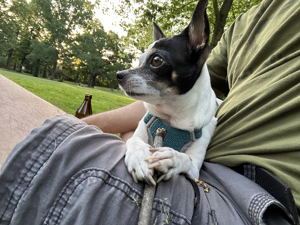

In [34]:
image_path = '../dataset/test/chiki/IMG_9015.jpg'

# Upload the image and get the response
base_caption, detected_pet, confidence, refined_caption = upload_image(image_path)

# Display the results
print(f"Detected Pet: {detected_pet}")
print(f"Confidence: {confidence}")
print(f"Base Caption: {base_caption}")
print(f"Refined Caption: {refined_caption}")

# Display the image
img = Image.open(image_path)
img.thumbnail((300, 300))
img

This one is completely wrong!
I think we have seen enough. There is a lot of room for improvement.

## Conclusion

The image caption API is not perfect. It can generate accurate captions for some images, but it can also fail miserably. It seems to struggle with images that contain both Chiki and Lola. It also seems to repeat the same caption in some cases, this could be due to the small amount of training data, or lack of variety. 
Overall, the API has potential, but it needs more training and fine-tuning to improve. This will be done in the next notebook.